In [7]:
%%file libreria_onda_sinusoidal.c
#include <math.h>
void onda_sinusoidal(int elementos_por_periodo, float amplitud, int total_elementos, float *onda_sinusoidal){
    float periodo = 2* M_PI / elementos_por_periodo;
    for(int i=0; i<total_elementos;i++){
        onda_sinusoidal[i]= amplitud*sin(periodo * i);
    }
}

Overwriting libreria_onda_sinusoidal.c


In [8]:
! gcc -c libreria_onda_sinusoidal.c -o libreria_onda_sinusoidal.o -lm

In [9]:
! gcc -shared libreria_onda_sinusoidal.o -o libreria_onda_sinusoidal.so

In [10]:
import numpy as np
def onda_sinusoidal(elementos_por_periodo, amplitud, total_elementos, onda_sinusoidal):
    periodo = 2*np.pi / elementos_por_periodo
    for i in range(total_elementos):
        onda_sinusoidal[i] = amplitud*np.sin(periodo*i)

In [11]:
import ctypes
import matplotlib.pyplot as plt
lib = ctypes.CDLL('./libreria_onda_sinusoidal.so')
lib.onda_sinusoidal.argtypes = [ctypes.c_int, ctypes.c_float, ctypes.c_int, np.ctypeslib.ndpointer(dtype=np.float32)]

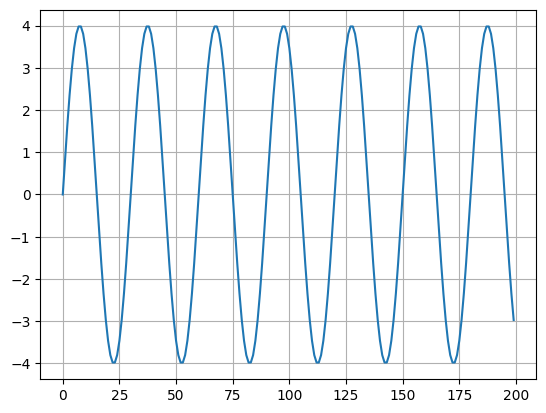

In [12]:
elementos_por_periodo = 30
amplitud = 4.0
total_elementos = 200
onda_sinusoidal_c = np.zeros(total_elementos, dtype=np.float32)

lib.onda_sinusoidal(elementos_por_periodo, amplitud, total_elementos, onda_sinusoidal_c)
plt.plot(onda_sinusoidal_c)
plt.grid()


In [15]:
import time
import statistics
tams = 2 ** np.arange(10,17)
veces = 30
t_py = []
t_c = []
for tam in tams:
  
  arr = np.zeros(tam, dtype=np.float32)
  
  py_arr = arr.copy()
  
  c_arr = arr.copy()
  
  t_py_i = []
  
  t_c_i = []

  for i in range(veces):
    
    tic = time.perf_counter()
    
    onda_sinusoidal(elementos_por_periodo,amplitud,tam, py_arr)
    
    toc = time.perf_counter()
    
    t_py_i.append(toc-tic)

    
    tic = time.perf_counter()
    
    lib.onda_sinusoidal(elementos_por_periodo, amplitud, tam, c_arr)
    
    toc = time.perf_counter()
    
    t_c_i.append(toc-tic)

  
  t_py.append(statistics.median(t_py_i))
  
  t_c.append(statistics.median(t_c_i))

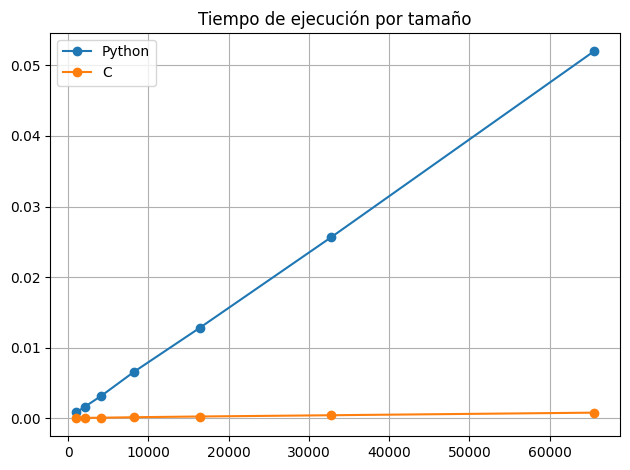

In [16]:
plt.plot(tams, t_py, '-o', label='Python')
plt.plot(tams, t_c, '-o', label='C')
plt.legend()
plt.grid(True)
plt.title('Tiempo de ejecución por tamaño')
plt.tight_layout()

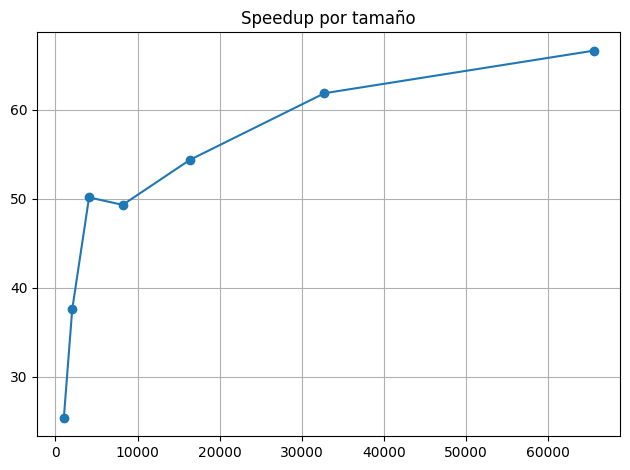

In [17]:
plt.plot(tams, np.asarray(t_py)/np.asarray(t_c), '-o')
plt.grid(True)
plt.title('Speedup por tamaño')
plt.tight_layout()